# Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt
from pathlib import Path

Using TensorFlow backend.


## Import Data

In [2]:
data_train = pd.read_csv('../data/trump/train_rounds_filtered_merged.csv', header=None)
data_test = pd.read_csv('../data/trump/test_rounds_filtered_merged.csv', header=None)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

trump = ['trump']

In [3]:
# data_train
data_train.columns = cards + trump
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,3
1,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,6
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,6
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,3


In [4]:
# data_test
data_test.columns = cards + trump
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,6
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


add data column with NrD, NrH, NrS, NrC, NrA, Nr6

In [5]:
# data_train
#data_train.insert(loc=len(data_train.columns), column='NrD', value=data_train.iloc[:,0:9].sum(axis=1) / 9.0)
#data_train.insert(loc=len(data_train.columns), column='NrH', value=data_train.iloc[:,9:18].sum(axis=1) / 9.0)
#data_train.insert(loc=len(data_train.columns), column='NrS', value=data_train.iloc[:,18:27].sum(axis=1) / 9.0)
#data_train.insert(loc=len(data_train.columns), column='NrC', value=data_train.iloc[:,27:36].sum(axis=1) / 9.0)

#data_train.insert(loc=len(data_train.columns), column='NrA', value=data_train.iloc[:,0:36:9].sum(axis=1) / 4.0)
#data_train.insert(loc=len(data_train.columns), column='Nr6', value=data_train.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,3
1,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,6
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,6
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,3


In [6]:
# data_test
#data_test.insert(loc=len(data_test.columns), column='NrD', value=data_test.iloc[:,0:9].sum(axis=1) / 9.0)
#data_test.insert(loc=len(data_test.columns), column='NrH', value=data_test.iloc[:,9:18].sum(axis=1) / 9.0)
#data_test.insert(loc=len(data_test.columns), column='NrS', value=data_test.iloc[:,18:27].sum(axis=1) / 9.0)
#data_test.insert(loc=len(data_test.columns), column='NrC', value=data_test.iloc[:,27:36].sum(axis=1) / 9.0)

#data_test.insert(loc=len(data_test.columns), column='NrA', value=data_test.iloc[:,0:36:9].sum(axis=1) / 4.0)
#data_test.insert(loc=len(data_test.columns), column='Nr6', value=data_test.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,6
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
# x_train = data_train.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_train = data_train.drop('trump', axis='columns', inplace=False)
# x_train = data_train
x_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6
0,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,1,0,0,1,0


In [8]:
# x_test = data_test.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_test = data_test.drop('trump', axis='columns', inplace=False)
# x_test = data_test
x_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [9]:
#V2
y_train_label = data_train['trump']
y_train = keras.utils.to_categorical(y_train_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(36, activation='relu', input_shape=[36]))
#model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(43, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd', #'rmsprop', 'sgd', Adadelta()
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=150, shuffle=True)

Epoch 1/100
116132/116132 [==============================] - 2s 14us/step - loss: 1.7770 - accuracy: 0.3601
Epoch 2/100
116132/116132 [==============================] - 2s 13us/step - loss: 1.6579 - accuracy: 0.3804
Epoch 3/100
116132/116132 [==============================] - 2s 13us/step - loss: 1.4134 - accuracy: 0.4664
Epoch 4/100
116132/116132 [==============================] - 2s 14us/step - loss: 1.1844 - accuracy: 0.5426
Epoch 5/100
116132/116132 [==============================] - 2s 14us/step - loss: 1.0713 - accuracy: 0.5788
Epoch 6/100
116132/116132 [==============================] - 2s 13us/step - loss: 1.0172 - accuracy: 0.5923
Epoch 7/100
116132/116132 [==============================] - 1s 13us/step - loss: 0.9927 - accuracy: 0.6016
Epoch 8/100
116132/116132 [==============================] - 1s 12us/step - loss: 0.9833 - accuracy: 0.6050
Epoch 9/100
116132/116132 [==============================] - 1s 12us/step - loss: 0.9783 - accuracy: 0.6057
Epoch 10/100
116132/116132 [

116132/116132 [==============================] - 1s 11us/step - loss: 0.8693 - accuracy: 0.6393
Epoch 77/100
116132/116132 [==============================] - 2s 13us/step - loss: 0.8691 - accuracy: 0.6387
Epoch 78/100
116132/116132 [==============================] - 1s 12us/step - loss: 0.8684 - accuracy: 0.6387
Epoch 79/100
116132/116132 [==============================] - 2s 13us/step - loss: 0.8683 - accuracy: 0.6400
Epoch 80/100
116132/116132 [==============================] - 1s 12us/step - loss: 0.8677 - accuracy: 0.6400
Epoch 81/100
116132/116132 [==============================] - 2s 13us/step - loss: 0.8672 - accuracy: 0.6399
Epoch 82/100
116132/116132 [==============================] - 2s 13us/step - loss: 0.8671 - accuracy: 0.6401
Epoch 83/100
116132/116132 [==============================] - 1s 13us/step - loss: 0.8667 - accuracy: 0.6393
Epoch 84/100
116132/116132 [==============================] - 2s 13us/step - loss: 0.8664 - accuracy: 0.6396
Epoch 85/100
116132/116132 [====

In [10]:
model.summary()
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 43)                1591      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1100      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 182       
Total params: 4,205
Trainable params: 4,205
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.16359664,  0.0123012 , -0.01978308, ...,  0.12447972,
        -0.0140724 , -0.06101503],
       [-0.09627496, -0.04269584, -0.05587625, ..., -0.27333477,
        -0.06209165,  0.02405202],
       [-0.1784297 ,  0.1013994 ,  0.04002409, ..

Text(0, 0.5, 'loss')

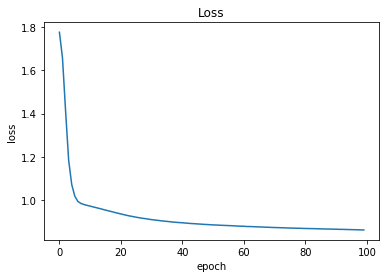

In [11]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

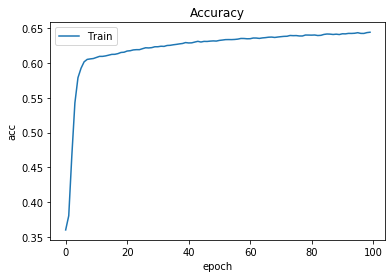

In [12]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [13]:
history.history['accuracy'][-1]

0.64404297

# Predict

In [14]:
y_pred = model.predict(x_test)
# print(y_pred)

In [15]:
TOTAL_COUNT = len(x_test)
CORRECT_COUNT = 0

for i in range(0,len(y_pred)):
    global CORRECT_TRUMP
    
    predicted_trump = np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]
    real_trump = data_test.iloc[i]['trump']
    
    #print(predicted_trump)
    #print(real_trump)
    
    if int(predicted_trump) == int(real_trump):
        CORRECT_COUNT = CORRECT_COUNT + 1

In [16]:
accuracy = (CORRECT_COUNT / TOTAL_COUNT) * 100
print(f'Total Count   : {TOTAL_COUNT}')
print(f'Correct Count : {CORRECT_COUNT}')
print(f'Accuracy      : {accuracy}')

Total Count   : 45025
Correct Count : 28199
Accuracy      : 62.629650194336485


### Versions

| Version | CSV | epoch | Batch size | Layers                    | Loss   | AccTrain | AccTest |
| ------- | --- | ----- | ---------- | ------------------------- | ------ | -------- | ------- |
| V0      | 1   | 100   | 2500       | 9 relu & 1 softmax        | 0.89   | 0.61     | 0.615   |
| V1      | 1   | 100   | 1000       | 9 relu & 1 softmax        | 0.8309 | 0.6365   | 0.6344  |
| V2      | 1   | 100   | 50         | 2 relu & 1 softmax        |        |          |         |

In [18]:
#Save the model in MlBasedPlayer
import datetime

version = "V2"
datetime = datetime.datetime.now().isoformat()

model.save_weights(f'../MlBasedPlayer/trump_prediction_model_{version}_{datetime}.h5')
